In [2]:
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv("netflix.csv")

In [4]:
df.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

### 1 ¿Qué tipo de show es el más frecuente?

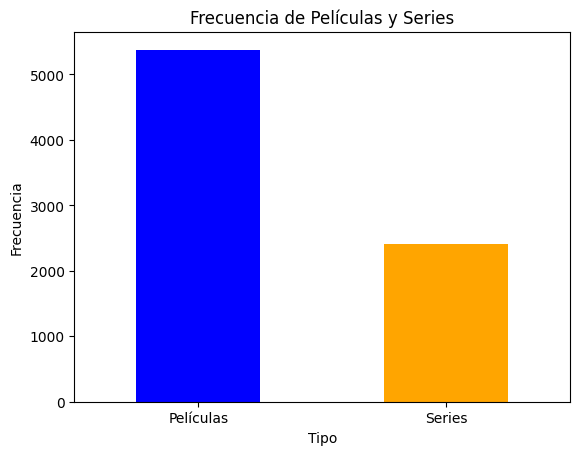

In [5]:
frecuencia_tipos = df['type'].value_counts()

# Crea la figura y los ejes
fig, ax = plt.subplots()

# Grafica el gráfico de barras de frecuencia de tipos
frecuencia_tipos.plot(kind='bar', ax=ax, color=['blue', 'orange'])

# Configura el título y las etiquetas de los ejes
ax.set_title('Frecuencia de Películas y Series')
ax.set_xlabel('Tipo')
ax.set_ylabel('Frecuencia')
ax.set_xticklabels(['Películas', 'Series'], rotation=0)

# Muestra la gráfica
plt.show()

### 2 ¿En qué año se produjeron más películas y series?

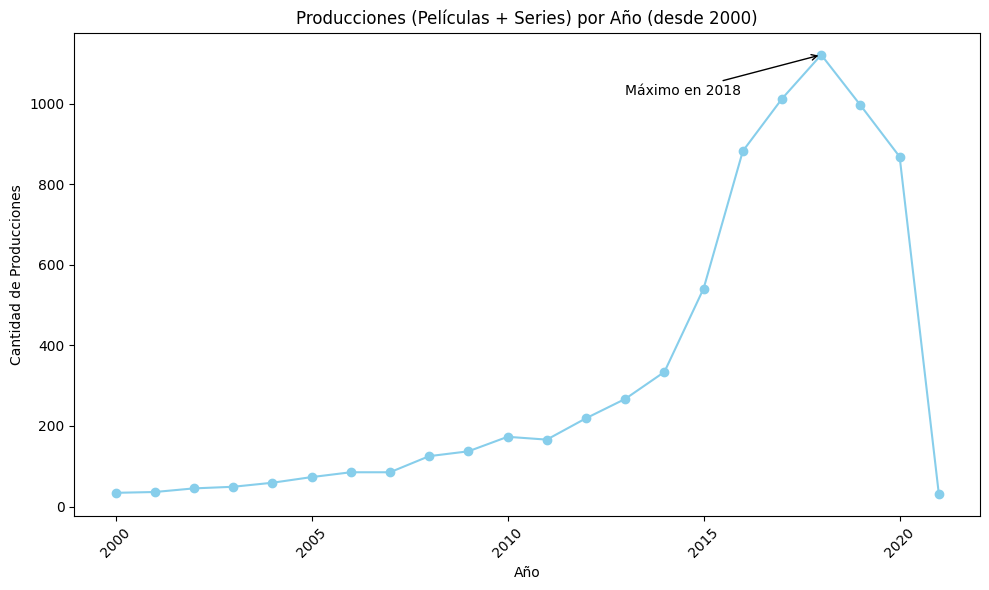

In [6]:
# Filtra el DataFrame para incluir solo los datos a partir del año 2000
df_desde_2000 = df[df['release_year'] >= 2000]

# Agrupa el DataFrame filtrado por año de lanzamiento y cuenta la cantidad de películas y series en cada año
producciones_por_año = df_desde_2000.groupby('release_year')['type'].value_counts().unstack().fillna(0)

# Calcula el total de producciones (películas + series) por año
producciones_por_año['Total'] = producciones_por_año.sum(axis=1)

# Encuentra el año con el mayor número total de producciones
año_max_producciones = producciones_por_año['Total'].idxmax()

# Crea la figura y los ejes
fig, ax = plt.subplots(figsize=(10, 6))

# Grafica la cantidad total de producciones por año como un gráfico de líneas
producciones_por_año['Total'].plot(kind='line', ax=ax, color='skyblue', marker='o')

# Destaca el año con el mayor número de producciones
ax.annotate(f'Máximo en {año_max_producciones}', xy=(año_max_producciones, producciones_por_año['Total'].max()),
            xytext=(año_max_producciones - 5, producciones_por_año['Total'].max() - 100),
            arrowprops=dict(facecolor='black', arrowstyle='->'))

# Configura el título y las etiquetas de los ejes
ax.set_title('Producciones (Películas + Series) por Año (desde 2000)')
ax.set_xlabel('Año')
ax.set_ylabel('Cantidad de Producciones')

# Muestra la gráfica
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### 3. ¿Qué países aportan más películas y series de TV?

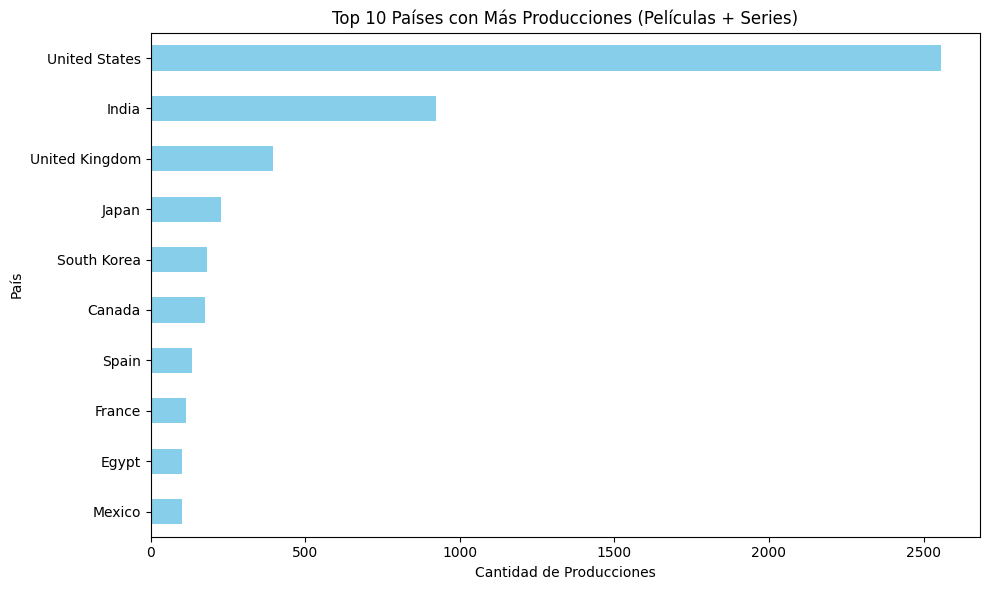

In [7]:

# Agrupa el DataFrame por país y cuenta la cantidad de películas y series en cada país
producciones_por_pais = df.groupby('country')['type'].value_counts().unstack().fillna(0)

# Calcula el total de producciones (películas + series) por país
producciones_por_pais['Total'] = producciones_por_pais.sum(axis=1)

# Ordena los países por la cantidad total de producciones
producciones_por_pais = producciones_por_pais.sort_values(by='Total', ascending=True)

# Filtra los 10 países con la mayor cantidad total de producciones
top_10_paises = producciones_por_pais.tail(10)

# Crea la figura y los ejes
fig, ax = plt.subplots(figsize=(10, 6))

# Grafica la cantidad total de producciones por país como un gráfico de barras horizontales
top_10_paises['Total'].plot(kind='barh', ax=ax, color='skyblue')

# Configura el título y las etiquetas de los ejes
ax.set_title('Top 10 Países con Más Producciones (Películas + Series)')
ax.set_xlabel('Cantidad de Producciones')
ax.set_ylabel('País')

# Muestra la gráfica
plt.tight_layout()
plt.show()

### 4

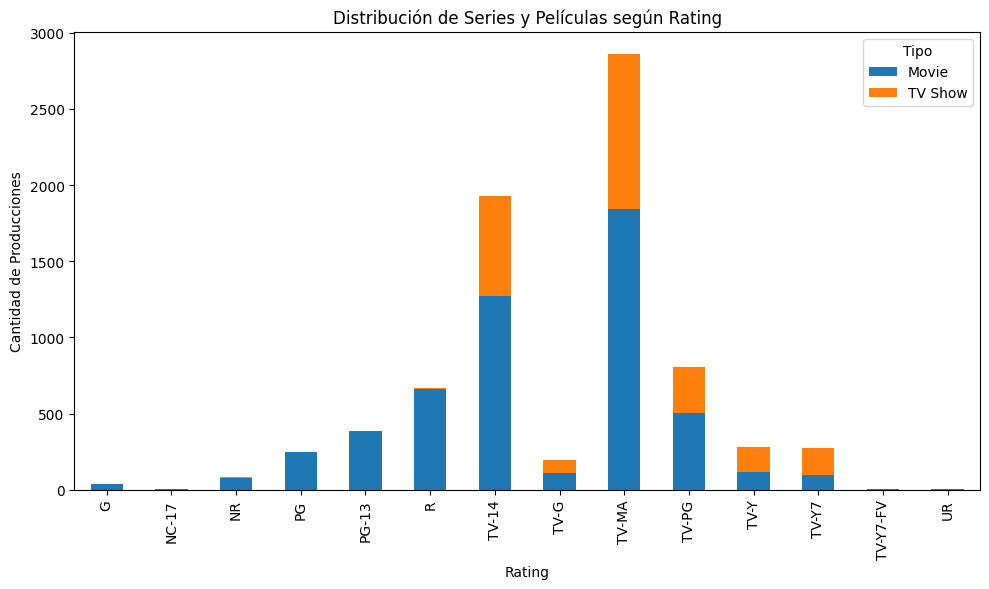

In [15]:
# Suponiendo que 'df' es tu DataFrame con la información de películas y series
# Reemplaza 'df' con el nombre real de tu DataFrame

# Agrupa el DataFrame por rating y tipo (serie o película) y cuenta la cantidad de producciones en cada categoría
distribucion_por_rating = df.groupby(['rating', 'type']).size().unstack(fill_value=0)

# Reordena las columnas del DataFrame para que las categorías de rating estén ordenadas de menor a mayor
ratings_ordenados = sorted(distribucion_por_rating.index)

# Crea el nuevo DataFrame con las columnas ordenadas
distribucion_por_rating_ordenado = distribucion_por_rating.reindex(ratings_ordenados)

# Crea la figura y los ejes
fig, ax = plt.subplots(figsize=(10, 6))

# Grafica la distribución de la cantidad de series y películas según rating como un gráfico de barras apiladas
distribucion_por_rating_ordenado.plot(kind='bar', stacked=True, ax=ax)

# Configura el título y las etiquetas de los ejes
ax.set_title('Distribución de Series y Películas según Rating')
ax.set_xlabel('Rating')
ax.set_ylabel('Cantidad de Producciones')

# Muestra la gráfica
plt.tight_layout()
plt.legend(title='Tipo')
plt.show()

### 5 ¿Cómo se distribuye la audiencia objetivo (usar rating para esto) según el origen de los shows?

/var/folders/3l/g6ng2bts1j78r5313d79x6fh0000gn/T/ipykernel_86919/116041839.py:17: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


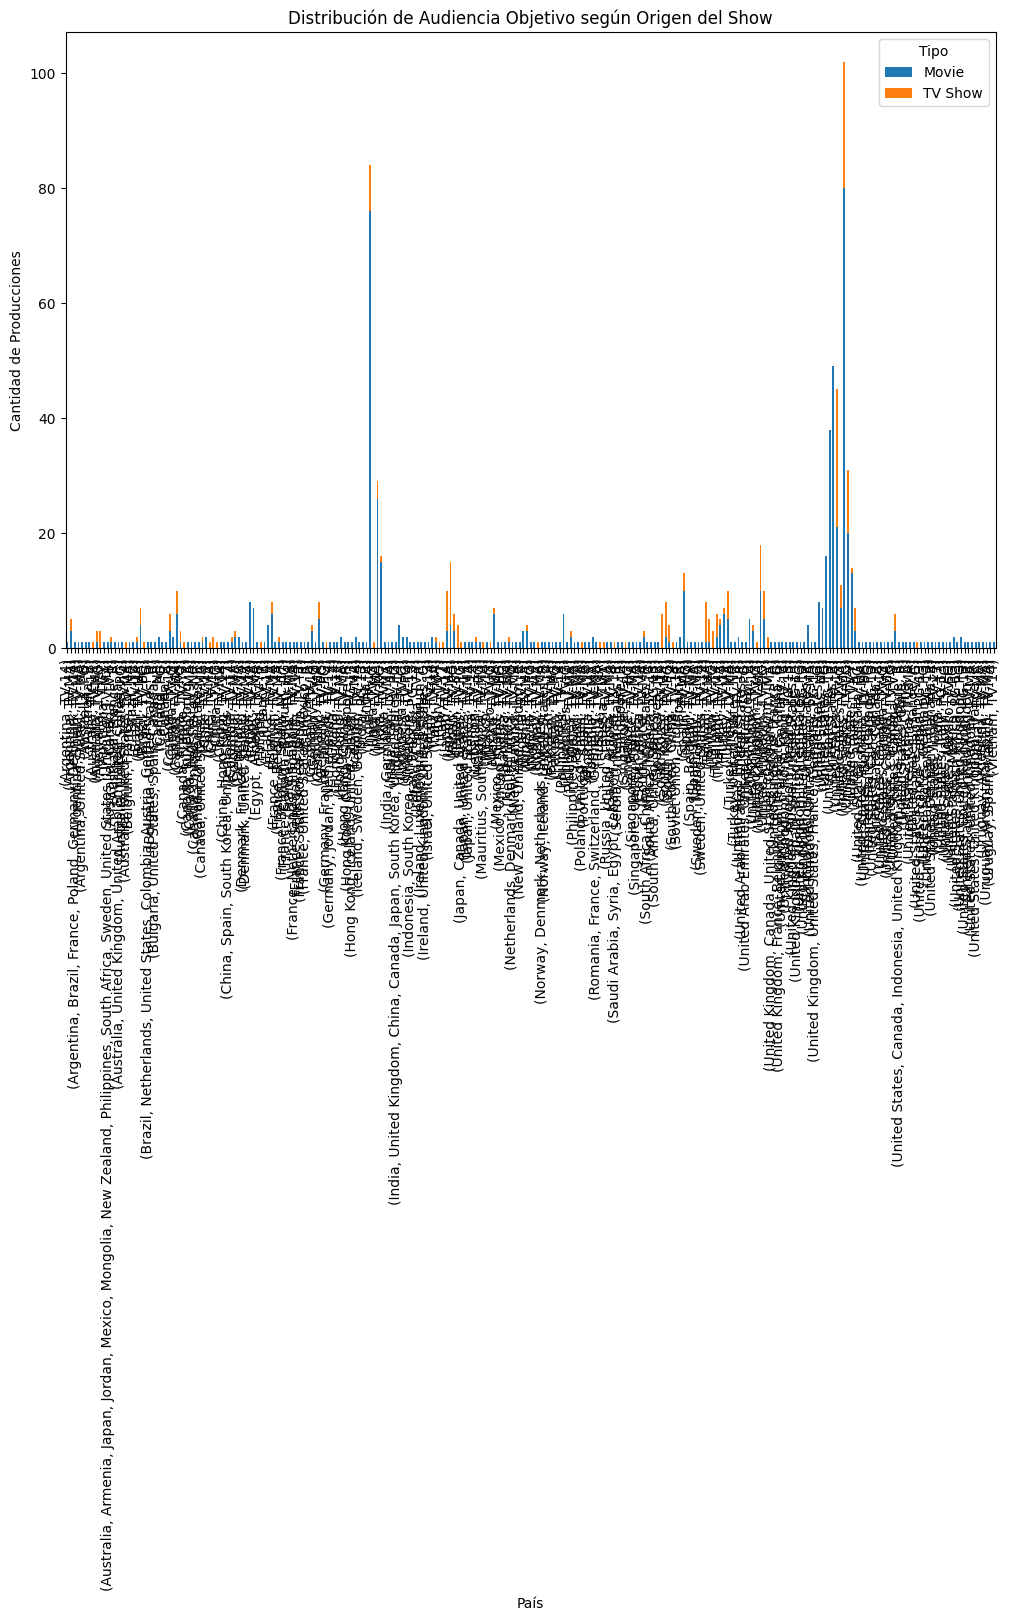

In [11]:
df_chico = df.head(1000)
distribucion_por_origen_y_rating = df_chico.groupby(['country', 'rating', 'type']).size().unstack(fill_value=0)

# Crea la figura y los ejes
fig, ax = plt.subplots(figsize=(12, 8))

# Grafica la distribución de la cantidad de series y películas según rating para cada país como un gráfico de barras apiladas
distribucion_por_origen_y_rating.plot(kind='bar', stacked=True, ax=ax)

# Configura el título y las etiquetas de los ejes
ax.set_title('Distribución de Audiencia Objetivo según Origen del Show')
ax.set_xlabel('País')
ax.set_ylabel('Cantidad de Producciones')
ax.legend(title='Tipo')

# Muestra la gráfica
plt.tight_layout()
plt.show()